In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import PercentFormatter

from pathlib import Path
import seaborn as sns
import scipy.stats as ss

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
raw_df = pd.read_csv('bank-full.csv', header= 0, delimiter= ";")
raw_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
raw_df.shape

(45211, 17)

In [4]:
raw_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
raw_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Defining the two major kinds of column types for the EDA: numerical (num_col) and categorical (cat_col) data types. The categorical data also includes boolean categories.

In [7]:
num_col = ['age', "balance", 'day', 'duration', 'campaign', 'previous']
cat_col = ['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'default', 'housing', 'loan', 'pdays_cat', 'y_bool']

In [8]:
num_of_days = pd.cut(raw_df.pdays, bins=[-2, 0, 120, 365, 9999], labels=['no contact', '3 months', '1 year', 'more than 1 year'])
num_of_days.value_counts()

no contact          36954
1 year               5715
3 months             1899
more than 1 year      643
Name: pdays, dtype: int64

In [9]:
raw_df['pdays_cat'] = num_of_days
raw_df = raw_df.astype({'pdays_cat': str})
raw_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,no contact
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,no contact
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,no contact
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,no contact
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,no contact


In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  pdays_cat  45211 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.2+ MB


In [11]:
outcome = raw_df['y']
outcome.replace('no', 0, inplace=True)
outcome.replace('yes', 1, inplace=True)
outcome.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [12]:
raw_df['y_bool'] = outcome
raw_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_cat,y_bool
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,no contact,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,no contact,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,no contact,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,no contact,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,no contact,0


In [13]:
raw_df['cust_id'] = raw_df.index
raw_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_cat,y_bool,cust_id
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,no contact,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,no contact,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,no contact,0,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,no contact,0,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,no contact,0,4


In [14]:
jobs = raw_df['job']
jobs.replace('blue-collar', 'blueCollar', inplace=True)
jobs.replace('self-employed', 'selfEmployed', inplace=True)
jobs.replace('admin.', 'admin', inplace=True)
jobs.value_counts()

blueCollar      9732
management      9458
technician      7597
admin           5171
services        4154
retired         2264
selfEmployed    1579
entrepreneur    1487
unemployed      1303
housemaid       1240
student          938
unknown          288
Name: job, dtype: int64

In [15]:
raw_df['job'] = jobs
raw_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_cat,y_bool,cust_id
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,no contact,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,no contact,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,no contact,0,2
3,47,blueCollar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,no contact,0,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,no contact,0,4


In [16]:
raw_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
pdays_cat    0
y_bool       0
cust_id      0
dtype: int64

In [17]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
 17  pdays_cat  45211 non-null  object
 18  y_bool     45211 non-null  int64 
 19  cust_id    45211 non-null  int64 
dtypes: int64(10), object(10)
mem

Splitting into train, test set

In [18]:
df_train, df_test = train_test_split(raw_df, test_size=0.3, random_state= 42)

In [19]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
df_train.shape,df_test.shape

((31647, 20), (13564, 20))

In [21]:
round(df_train.y_bool.mean(),3),round(df_test.y_bool.mean(),3)

(0.117, 0.118)

In [22]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_cat,y_bool,cust_id
0,36,technician,single,tertiary,no,0,no,no,unknown,17,jun,153,4,-1,0,unknown,0,no contact,0,10747
1,56,entrepreneur,married,secondary,no,196,no,no,cellular,19,nov,312,3,-1,0,unknown,0,no contact,0,26054
2,46,blueCollar,married,secondary,no,0,yes,no,unknown,5,jun,83,2,-1,0,unknown,0,no contact,0,9125
3,41,management,divorced,tertiary,no,3426,no,no,cellular,1,oct,302,1,119,5,success,0,3 months,0,41659
4,38,blueCollar,married,secondary,no,0,yes,no,unknown,20,may,90,1,-1,0,unknown,0,no contact,0,4443


Going forward, we will use training dataset for EDA.

In [23]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [24]:
data = df_train.drop(columns=['pdays', 'y'])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,pdays_cat,y_bool,cust_id
0,36,technician,single,tertiary,no,0,no,no,unknown,17,jun,153,4,0,unknown,no contact,0,10747
1,56,entrepreneur,married,secondary,no,196,no,no,cellular,19,nov,312,3,0,unknown,no contact,0,26054
2,46,blueCollar,married,secondary,no,0,yes,no,unknown,5,jun,83,2,0,unknown,no contact,0,9125
3,41,management,divorced,tertiary,no,3426,no,no,cellular,1,oct,302,1,5,success,3 months,0,41659
4,38,blueCollar,married,secondary,no,0,yes,no,unknown,20,may,90,1,0,unknown,no contact,0,4443


In [25]:
data['month'] = pd.Categorical(data['month'],
                                   categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                                   ordered=True)
data['marital'] = pd.Categorical(data['marital'],
                                    categories=['single', 'married', 'divorced'], 
                                    ordered=True)
data['poutcome'] = pd.Categorical(data['poutcome'],
                                   categories=['success', 'failure', 'other', 'unknown'],
                                   ordered=True)

In [26]:
data_bal = data[data['balance'] < 13000]
data_bal = data_bal[data_bal['balance'] > -4500]

data_dur = data[data['duration'] < 1800]
data_cam = data[data['campaign'] < 25]
data_pre = data[data['previous'] < 35]

In [27]:
# initial source: https://github.com/rohanML/home_credit_default_risk/blob/master/notebooks/02_Exploratory_Data_Analysis.ipynb

#To track modified features : 
# eg combine levels with few records into one level called 'Others'

modified_features = dict()

# From Pandas Cookbook 1.X
def flatten_cols(df):
    df.columns = ['_'.join(x) for x in
        df.columns.to_flat_index()]
    return df

# to save plots
p = Path.cwd().parent / 'Portugese Banking Project' / 'reports' / 'figures'
suffix ='.pdf'

Age Analysis

In [28]:
data.age.max()

95

In [29]:
age_cat = []
age_col = data.age
for i in age_col:
    if i < 20:
        age_cat.append('18-20')
    elif i < 25:
        age_cat.append('20-24')
    elif i < 30:
        age_cat.append('25-29')
    elif i < 35:
        age_cat.append('30-34')        
    elif i < 40:
        age_cat.append('35-39')
    elif i < 45:
        age_cat.append('40-44')
    elif i < 50:
        age_cat.append('45-49')
    elif i < 55:
        age_cat.append('50-54')        
    elif i < 60:
        age_cat.append('55-59')
    else: # i > 60
        age_cat.append('60-95')        
        
data_age = data
data_age['age_cat'] = age_cat
data_age.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,pdays_cat,y_bool,cust_id,age_cat
0,36,technician,single,tertiary,no,0,no,no,unknown,17,jun,153,4,0,unknown,no contact,0,10747,35-39
1,56,entrepreneur,married,secondary,no,196,no,no,cellular,19,nov,312,3,0,unknown,no contact,0,26054,55-59
2,46,blueCollar,married,secondary,no,0,yes,no,unknown,5,jun,83,2,0,unknown,no contact,0,9125,45-49
3,41,management,divorced,tertiary,no,3426,no,no,cellular,1,oct,302,1,5,success,3 months,0,41659,40-44
4,38,blueCollar,married,secondary,no,0,yes,no,unknown,20,may,90,1,0,unknown,no contact,0,4443,35-39


In [30]:
age_pop = []
age_col = data.age
bins = [15, 24, 39, 54, 64, 99]
labels = ['15-24', '25-39', '40-54', '55-64', '65+']
age_pop = pd.cut(age_col, bins=bins, right = True, include_lowest=True, labels=labels)
data_age['age_pop'] = age_pop
data_age

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,pdays_cat,y_bool,cust_id,age_cat,age_pop
0,36,technician,single,tertiary,no,0,no,no,unknown,17,jun,153,4,0,unknown,no contact,0,10747,35-39,25-39
1,56,entrepreneur,married,secondary,no,196,no,no,cellular,19,nov,312,3,0,unknown,no contact,0,26054,55-59,55-64
2,46,blueCollar,married,secondary,no,0,yes,no,unknown,5,jun,83,2,0,unknown,no contact,0,9125,45-49,40-54
3,41,management,divorced,tertiary,no,3426,no,no,cellular,1,oct,302,1,5,success,3 months,0,41659,40-44,40-54
4,38,blueCollar,married,secondary,no,0,yes,no,unknown,20,may,90,1,0,unknown,no contact,0,4443,35-39,25-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,44,housemaid,single,primary,no,1059,no,no,unknown,18,jun,2093,1,0,unknown,no contact,1,11284,40-44,40-54
31643,23,student,single,tertiary,no,508,no,no,cellular,8,sep,210,1,1,failure,3 months,0,44732,20-24,15-24
31644,34,technician,divorced,tertiary,no,1317,yes,no,cellular,15,may,239,1,0,unknown,no contact,0,38158,30-34,25-39
31645,33,retired,married,secondary,no,165,no,no,unknown,7,may,111,1,0,unknown,no contact,0,860,30-34,25-39


In [31]:
client_age = data_age.age_pop.value_counts()
client_tot = client_age.sum(axis=0)

client_age_pct_dict = {k: v/ client_tot for k, v in client_age.items()}
client_pct = pd.Series(client_age_pct_dict)

client_age = pd.concat([client_age, client_pct], axis=1)
client_age.columns = ['Population', 'Percentage']

client_age

,Population,Percentage
25-39,15802,0.499321
40-54,11259,0.355768
55-64,3439,0.108667
15-24,574,0.018138
65+,573,0.018106


In [32]:
"""The average population values of Portugal for the years 2008, 2009, and 2010 were averaged to produce the numbers below."""

port_pop_dict = {'15-24': 1183783, '25-39': 2399055, '40-54': 2267395, '55-64': 1265694, '65+': 1902273}
port_pop = pd.Series(port_pop_dict)

port_tot = port_pop.sum(axis=0)
#port_pop = pd.Categorical(port_pop, categories=['15-24', '25-39', '40-54', '55-64', '65+'], ordered=True)

port_pop_pct_dict = {k: v/ port_tot for k, v in port_pop_dict.items()}
port_pct = pd.Series(port_pop_pct_dict)

port_pop = pd.concat([port_pop, port_pct], axis=1)
port_pop.columns = ['Population', 'Percentage']
port_pop

,Population,Percentage
15-24,1183783,0.131266
25-39,2399055,0.266024
40-54,2267395,0.251424
55-64,1265694,0.140349
65+,1902273,0.210937


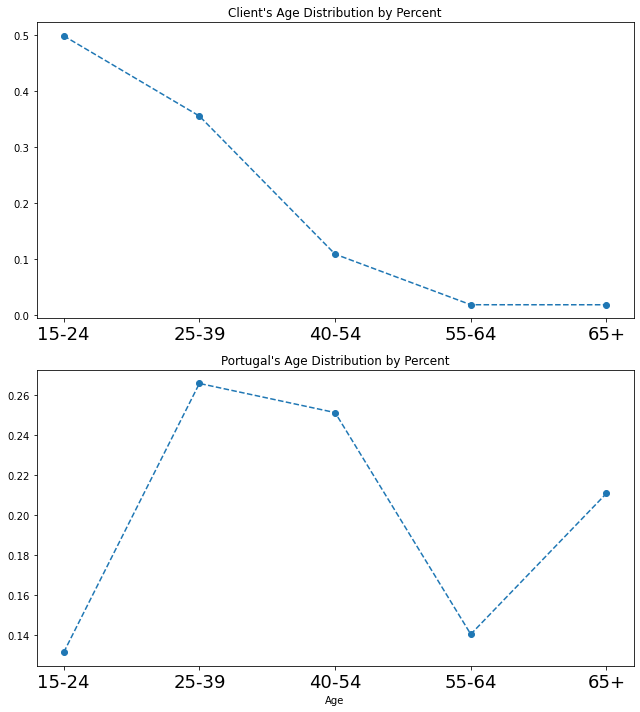

In [33]:
plt.figure(figsize=(9,10))

ax1 = plt.subplot(212)
plt.plot(['15-24', '25-39', '40-54', '55-64', '65+'], port_pop['Percentage'], 'o--')
plt.title("Portugal's Age Distribution by Percent")
plt.tick_params('x', labelsize=18)
plt.xlabel('Age')

ax2 = plt.subplot(211, sharex=ax1)
plt.plot(['15-24', '25-39', '40-54', '55-64', '65+'], client_age['Percentage'], 'o--')
plt.title("Client's Age Distribution by Percent")
plt.tick_params('x', labelsize=18)

#plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

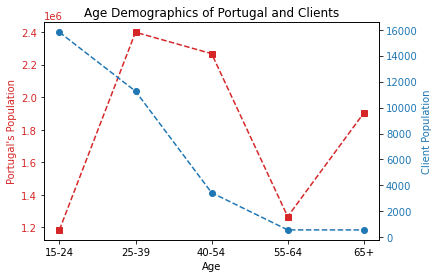

<Figure size 720x720 with 0 Axes>

In [34]:
#import matplotlib.ticker as tk

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,10))

color = 'tab:red'
ax1.plot(['15-24', '25-39', '40-54', '55-64', '65+'], port_pop['Population'], 's--', color = color)
ax1.set_xlabel('Age')
ax1.set_ylabel("Portugal's Population", color=color)
ax1.tick_params('y', labelcolor=color)

ax2 = ax1.twinx() #instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(['15-24', '25-39', '40-54', '55-64', '65+'], client_age['Population'], 'o--', color=color)
ax2.set_ylabel("Client Population", color=color)
ax2.tick_params('y', labelcolor =  color)

title = "Age Demographics of Portugal and Clients"
ax1.set_title(title)
plt.tight_layout()
plt.savefig(p / (title+'.pdf') )
plt.show()

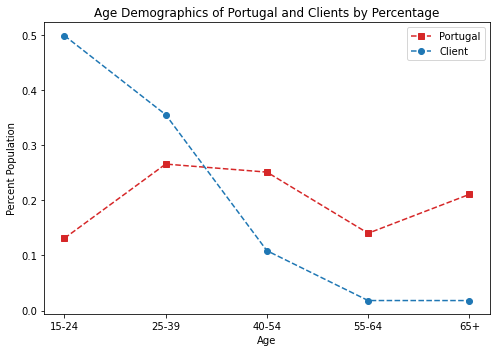

In [35]:
#import matplotlib.ticker as tk

plt.figure(figsize=(7,5))

color = 'tab:red'
plt.plot(['15-24', '25-39', '40-54', '55-64', '65+'], port_pop['Percentage'], 's--', color = color)
plt.xlabel('Age')
plt.ylabel("Percent Population")

#ax2 = ax1.twinx() #instantiate a second axes that shares the same x-axis

color = 'tab:blue'
plt.plot(['15-24', '25-39', '40-54', '55-64', '65+'], client_age['Percentage'], 'o--', color=color)

title = "Age Demographics of Portugal and Clients by Percentage"
plt.title(title)
plt.legend(["Portugal", 'Client'])
plt.tight_layout()
plt.savefig(p / (title+'.pdf') )
plt.show()

In [36]:
data[data.duration == 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,pdays_cat,y_bool,cust_id,age_cat,age_pop
1586,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,0,unknown,no contact,0,22937,35-39,25-39
8953,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,0,unknown,no contact,0,36425,30-34,25-39


In [37]:
previous_cat = []
pre_col = data.previous
for i in pre_col:
    if i < 0.5:
        previous_cat.append('0')
    elif i < 1.5:
        previous_cat.append('1')
    elif i < 2.5:
        previous_cat.append('2')
    elif i < 3.5:
        previous_cat.append('3')        
    elif i < 4.5:
        previous_cat.append('4')
    else:
        previous_cat.append('> 4')
        
data_pre = data
data_pre['prev_cat'] = previous_cat
data_pre.head()

data_pre['prev_cat'] = pd.Categorical(data['prev_cat'],
                                   categories=['0', '1', '2', '3', '4', '>4'],
                                   ordered=True)

<AxesSubplot:xlabel='prev_cat', ylabel='count'>

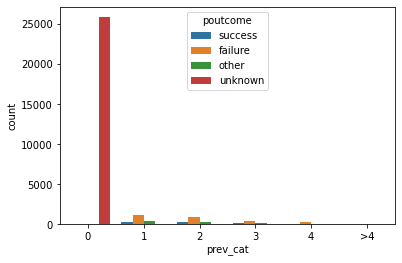

In [38]:
sns.countplot(hue='poutcome', x='prev_cat', data=data_pre)

The Acceptance rate is 11.698%


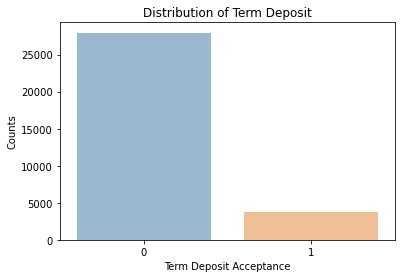

In [39]:
sns.countplot(x='y_bool',data = data, alpha=0.5)
plt.xlabel('Term Deposit Acceptance')
plt.ylabel('Counts')
plt.title('Distribution of Term Deposit');
print('The Acceptance rate is {}%'.format(round(raw_df.y_bool.mean(),5)*100))

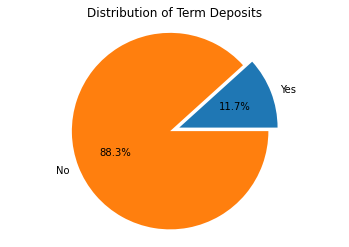

In [40]:
#making a pi chart for the report
acc_rate = round(raw_df.y_bool.mean(), 4)*100
labels = 'Yes', 'No'
sizes = [acc_rate, 100-(acc_rate)]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct = '%1.1f%%', startangle=0)
ax1.axis('equal')

title = "Distribution of Term Deposits"
ax1.set_title(title)
plt.savefig(p / (title+'.pdf') )
plt.show()

In [41]:
# initial source: https://github.com/rohanML/home_credit_default_risk/blob/master/notebooks/02_Exploratory_Data_Analysis.ipynb

#To track modified features : 
# eg combine levels with few records into one level called 'Others'

modified_features = dict()

# From Pandas Cookbook 1.X
def flatten_cols(df):
    df.columns = ['_'.join(x) for x in
        df.columns.to_flat_index()]
    return df

# to save plots
p = Path.cwd().parent / 'Portugese Banking Project' / 'reports' / 'figures'
suffix ='.pdf'


# To plot categorical featues.
# We plot categories on x-axis, default rate on primary y-axis & number of observations on secondary y axis.
# Plotting number of observations indicated the credibility of default rate.
def plot_default_cat_feat(df, var, var_desc, sort_by = None):
    """
    Plot default rate for different categories in the feature
    
    Keyword arguments:
    df -- DataFrame
    var -- categorical feature to be grouped by
    var_desc -- description of the feature to be displayed as label 
    sort_by -- specifies how the aggregated dataframe is sorted.  If it is
                'default_rate' -- categories are sorted by default rate in ascending order
                'count' -- categories are sorted by record counts in descending order
                None -- no sorting is done
    
    Missing values are represented by 'Missing' level.
    """

    with plt.style.context('bmh'):
        # aggregate the data
        df_grouped = df.groupby(var,dropna=False).agg({'y_bool':['mean'],'cust_id':['count']}).pipe(flatten_cols)
        df_grouped.index = df_grouped.index.fillna('Missing')

        # sorting
        if sort_by == 'count':
            df_grouped.sort_values(by='cust_id_count',ascending=False,inplace=True)
        elif sort_by == 'default_rate':
            df_grouped.sort_values(by='y_bool_mean',ascending=True,inplace=True)
        
        # plotting default rate on primary y-axis
        fig, ax = plt.subplots()
        # plt.rcParams['figure.dpi']= 480
        fontsize = 15
        # Increase the size of graph when we have more than 4 categories
        if df_grouped.shape[0] > 4:
            fig.set_size_inches(9,6)
            fontsize = 12
            plt.xticks(rotation=45, ha='right')
        ax.plot(df_grouped.index, df_grouped.y_bool_mean, 'o--', color= 'red',alpha=0.6)
        # Add value labels for dafault rates
        #source : https://stackoverflow.com/questions/59143306/add-label-values-to-bar-chart-and-line-chart-in-matplotlib
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.1%}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, 5), textcoords="offset points",
                        fontsize=fontsize,color = 'red',ha='center', va='bottom') 
            
        ax.set_title('Term Loan Subscription Rate by '+var_desc)
        ax.set_ylabel('Subscription Rate')
        ax.set_xlabel(var_desc)
        ax.set_facecolor('lavenderblush') #background color
        
        # setting the y-axis limit
        ax.set_ylim(ymin=0,ymax=df_grouped.y_bool_mean.max()+0.05)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        
        # plotting count of records on secondary y-axis
        ax2 = plt.twinx()
        ax2.bar(df_grouped.index,df_grouped.cust_id_count,
                    alpha=0.3, color='sandybrown')
        ax2.set_ylabel('Counts')
        ax2.grid(False)
        
        # Add legends for both y axes
        # source: https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
        # https://mpltest2.readthedocs.io/en/stable/gallery/recipes/transparent_legends.html
        fig.legend(labels=('Subscription Rate','Counts'),loc='upper right',bbox_to_anchor=(1,1),
                   bbox_transform=ax.transAxes,fancybox=True, framealpha=0.2)
        sns.despine(left=True,bottom=True,)
        plt.tight_layout()
        plt.savefig(p / (var_desc+'.pdf') )
        plt.show();
      
    
# To plot continuous features. We first convert continuous feature into suitable bins.
# Then we plot bins on x-axis, default rate on primary y-axis & number of observations on secondary y axis.
# Plotting number of observations indicated the credibility of default rate.


def plot_default_cont_feat(df, var, var_desc, n = 10, pct_range = (0.0,1.0), decimals = 0 ):
    """
    Plot default rate for continuous feature. We bin continuous feature & then plot default rate & count of observation.
    
    Keyword arguments:
    df -- DataFrame
    var -- categorical feature to be grouped by
    var_desc -- description of the feature to be displayed as label 
    n -- number of bins
    pct_range -- percentile range used for plotting. Values outside this range will be excluded.
    decimals -- to tune number of bins. eg if a feature has [0,1] range, then decimal is 
                atleast 2 to avoid duplicate bins.
                
    """
    df_temp = df[[var,'y_bool','cust_id']].copy()
    l_pct = pct_range[0]
    u_pct = pct_range[1]
    f_min = df_temp[var].quantile(l_pct) - 1/(10**decimals) # 0.01 added to that lower value is not excluded
    f_max = df_temp[var].quantile(u_pct) + 1/(10**decimals)
    mod_var = 'mod'+'_'+ var
    intvl = pd.interval_range(start=f_min, end= f_max, periods= n)
    # Round lower and upper limits of interval
    intvl = pd.IntervalIndex([ pd.Interval( round(i.left,decimals), 
                                round(i.right,decimals), i.closed ) for i in intvl ])
    df_temp.loc[:,mod_var]= pd.cut(df_temp[var],intvl)
    print('Count of missing observations : {}'.format(df_temp.loc[:,var].isna().sum()))
    excluded_obs = df_temp.loc[:,mod_var].isna().sum() - df_temp.loc[:,var].isna().sum()
    print('Count of excluded observations: {}'.format(excluded_obs))
    df_grouped = df_temp.groupby(mod_var,dropna=False).agg({'y_bool':['mean'],'cust_id':['count']}).pipe(flatten_cols)
    del df_temp  
    with plt.style.context('bmh'):
        # plotting default rate on primary y-axis
        fig, ax = plt.subplots()
        fig.set_size_inches(9,6)
        
        plt.xticks(rotation=45, ha='right')
        ax.plot(df_grouped.index.astype('str'), df_grouped.y_bool_mean, 'o--', color= 'red',alpha=0.6)
        ax.set_title('Term Loan Subscription Rate by '+var_desc)
        ax.set_ylabel('Subscription Rate')
        ax.set_xlabel(var_desc)
        ax.set_facecolor('lavenderblush') #background color
        
        # setting the y-axis limit
        ax.set_ylim(ymin=0,ymax=df_grouped.y_bool_mean.max()+0.05)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.1%}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(5, 5), textcoords="offset points",
                        fontsize=10,color = 'red',ha='center', va='bottom') 
        
        # plotting count of records on secondary y-axis
        ax2 = plt.twinx()
        ax2.bar(df_grouped.index.astype('str'),df_grouped.cust_id_count,
                    alpha=0.3, color='sandybrown')
        ax2.set_ylabel('Counts')
        ax2.grid(False)
        
        # Add legends for both y axes
        # source: https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
        # https://mpltest2.readthedocs.io/en/stable/gallery/recipes/transparent_legends.html
        fig.legend(labels=('Subscription Rate','Counts'),loc='upper right',bbox_to_anchor=(1,1),
                   bbox_transform=ax.transAxes,fancybox=True, framealpha=0.2)
        sns.despine(left=True,bottom=True,)
        plt.tight_layout()
        plt.savefig(p / (var_desc+'.pdf') )
        plt.show();
        

def sturge(N):
    
    """Finds the number of bins for a histogram based on Sturge's Rule.
    
    Keyword Arguments:
    N -- the number of samples in the set
    
    """
    K = 1 + 3.322* math.log(N, 10)
    return int(round(K,0))

bins = sturge(len(data))

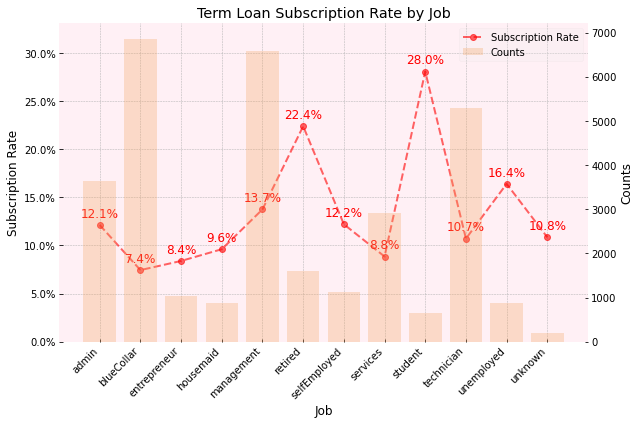

In [42]:
plot_default_cat_feat(data, 'job', 'Job')

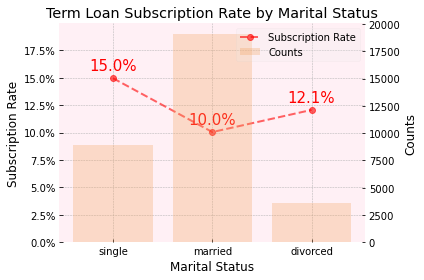

In [43]:
plot_default_cat_feat(data, 'marital', 'Marital Status')

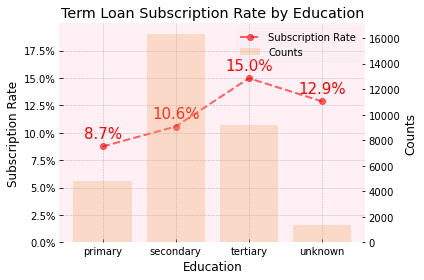

In [44]:
plot_default_cat_feat(data, 'education', 'Education')

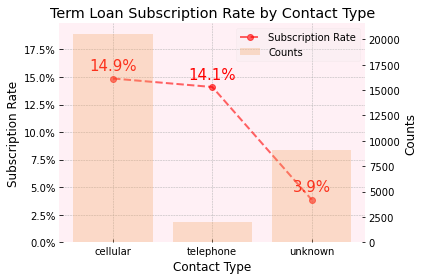

In [45]:
plot_default_cat_feat(data, 'contact', 'Contact Type')

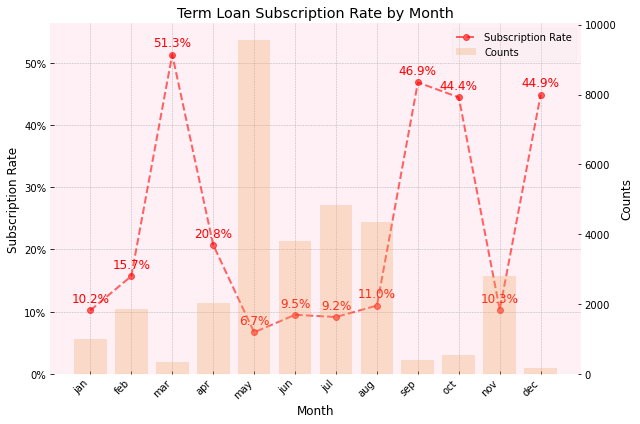

In [46]:
plot_default_cat_feat(data, 'month', 'Month')

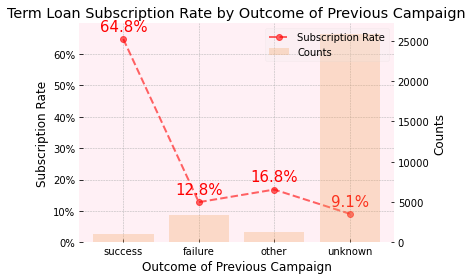

In [47]:
plot_default_cat_feat(data, 'poutcome', 'Outcome of Previous Campaign')

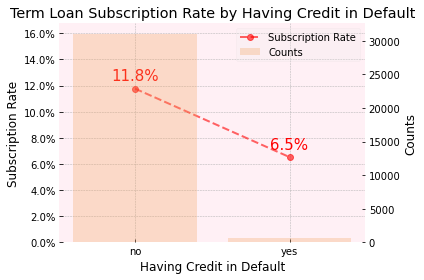

In [48]:
plot_default_cat_feat(data, 'default', 'Having Credit in Default')

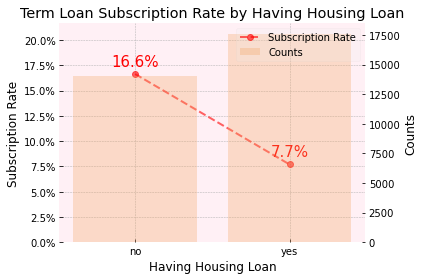

In [49]:
plot_default_cat_feat(data, 'housing', 'Having Housing Loan')

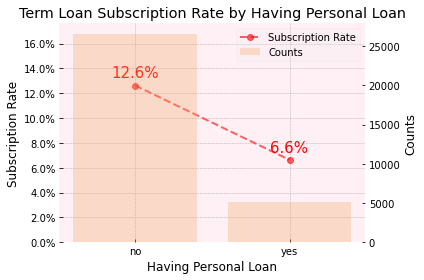

In [50]:
plot_default_cat_feat(data, 'loan', 'Having Personal Loan')

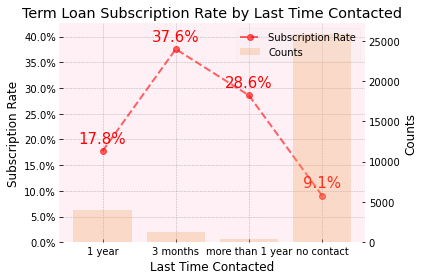

In [51]:
plot_default_cat_feat(data, 'pdays_cat', 'Last Time Contacted')

Count of missing observations : 0
Count of excluded observations: 0


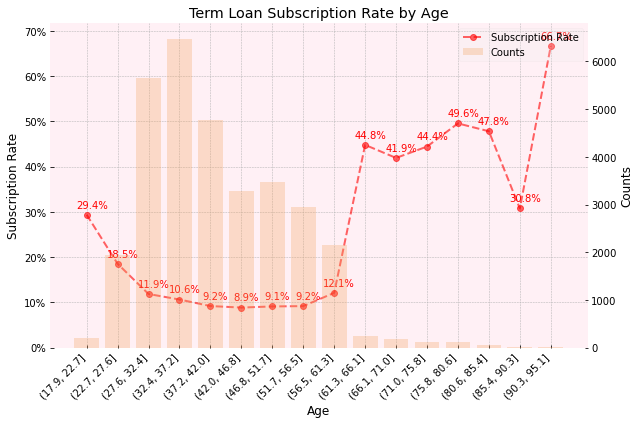

In [52]:
plot_default_cont_feat(data, 'age', "Age", n = bins, pct_range = (0.0,1.0), decimals = 1)

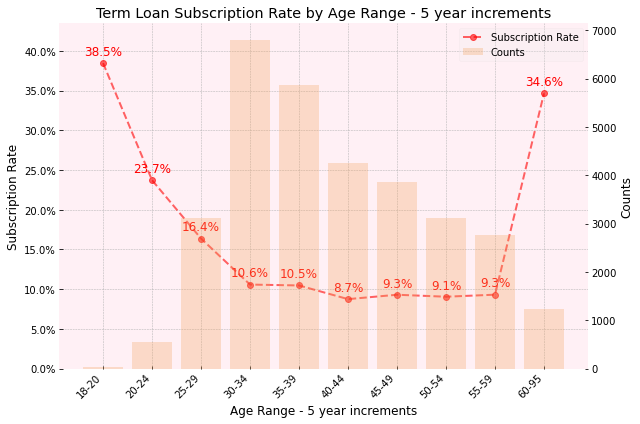

In [53]:
plot_default_cat_feat(data_age, 'age_cat', 'Age Range - 5 year increments')

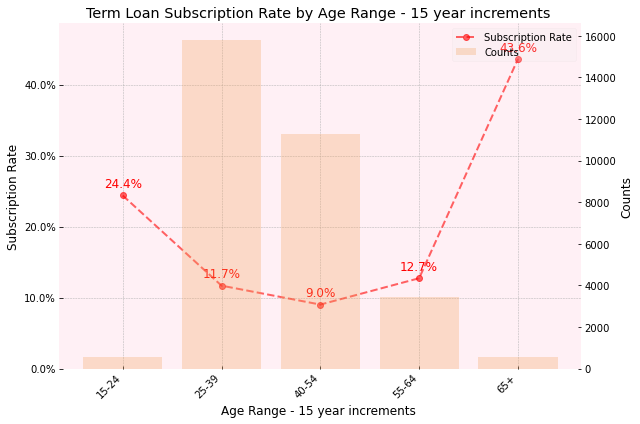

In [54]:
plot_default_cat_feat(data_age, 'age_pop', 'Age Range - 15 year increments ')

Count of missing observations : 0
Count of excluded observations: 0


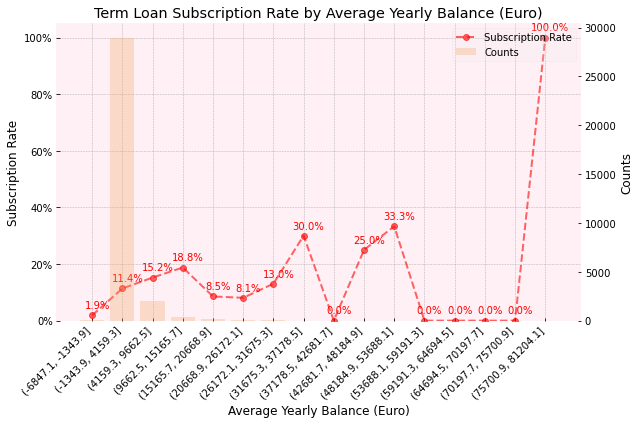

In [55]:
plot_default_cont_feat(data, 'balance', "Average Yearly Balance (Euro)", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


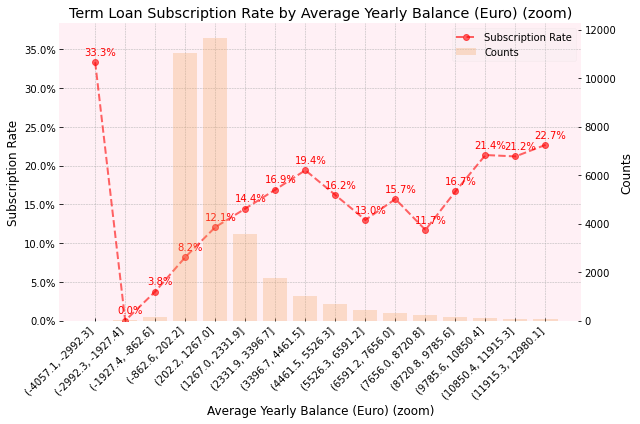

In [56]:
plot_default_cont_feat(data_bal, 'balance', "Average Yearly Balance (Euro) (zoom)", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


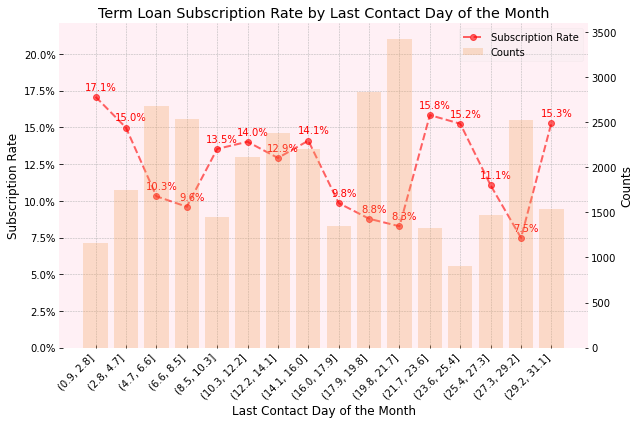

In [57]:
plot_default_cont_feat(data, 'day', "Last Contact Day of the Month", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


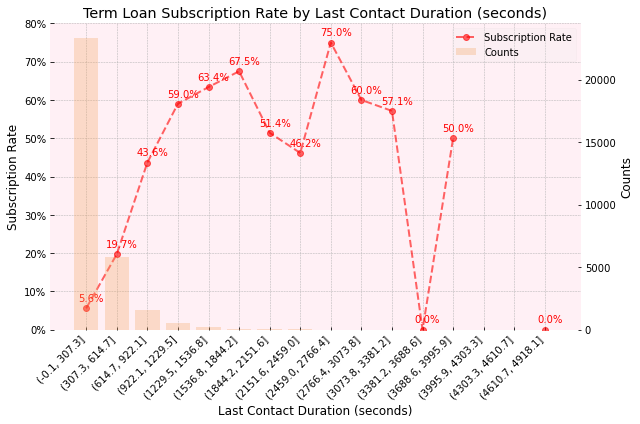

In [58]:
plot_default_cont_feat(data, 'duration', "Last Contact Duration (seconds)", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


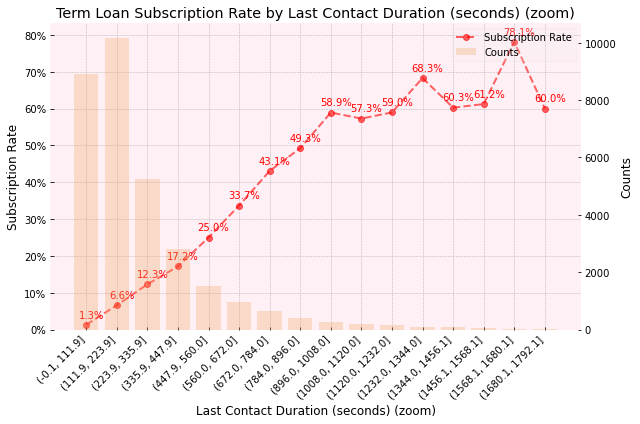

In [59]:
plot_default_cont_feat(data_dur, 'duration', "Last Contact Duration (seconds) (zoom)", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


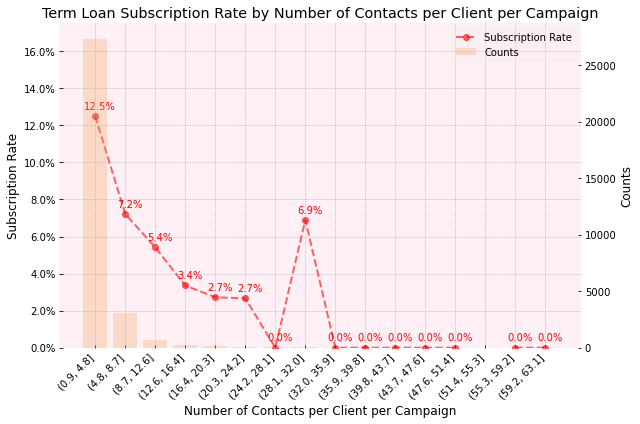

In [60]:
plot_default_cont_feat(data, 'campaign', "Number of Contacts per Client per Campaign", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


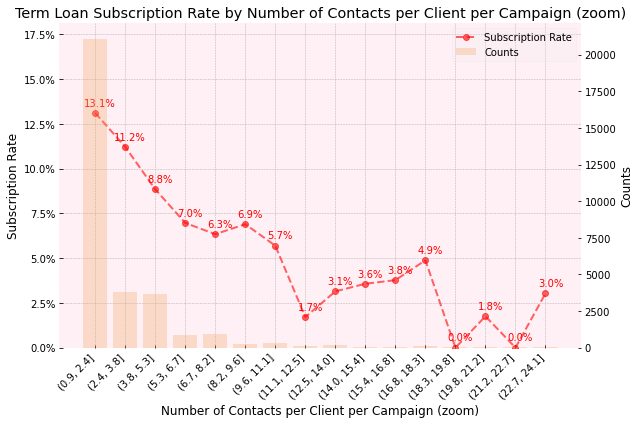

In [61]:
plot_default_cont_feat(data_cam, 'campaign', "Number of Contacts per Client per Campaign (zoom)", n = bins, pct_range = (0.0,1.0), decimals = 1)

Count of missing observations : 0
Count of excluded observations: 0


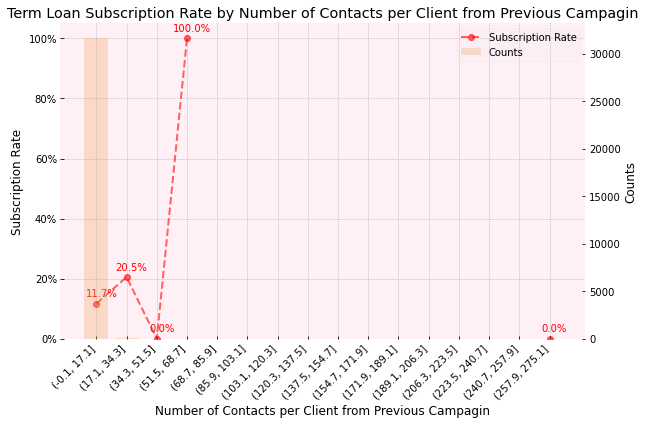

In [62]:
plot_default_cont_feat(data, 'previous', "Number of Contacts per Client from Previous Campagin", n = bins, pct_range = (0.0,1.0), decimals = 1)

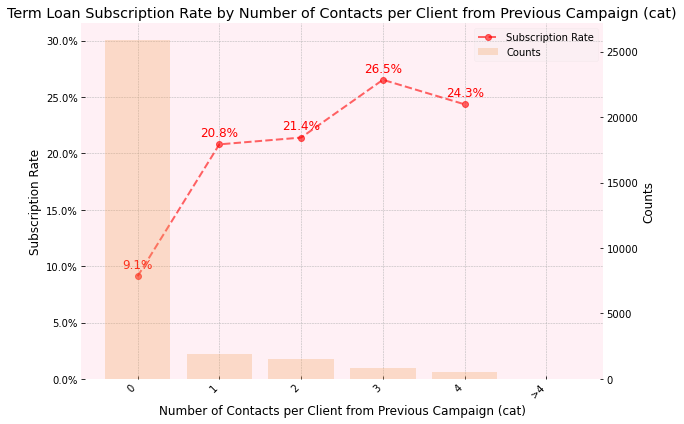

In [63]:
plot_default_cat_feat(data_pre, 'prev_cat', 'Number of Contacts per Client from Previous Campaign (cat)')

In [64]:
# original source: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

#this function is used for correlation between multi-level categorical features (non-binomial) and numerical features
# extracted from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

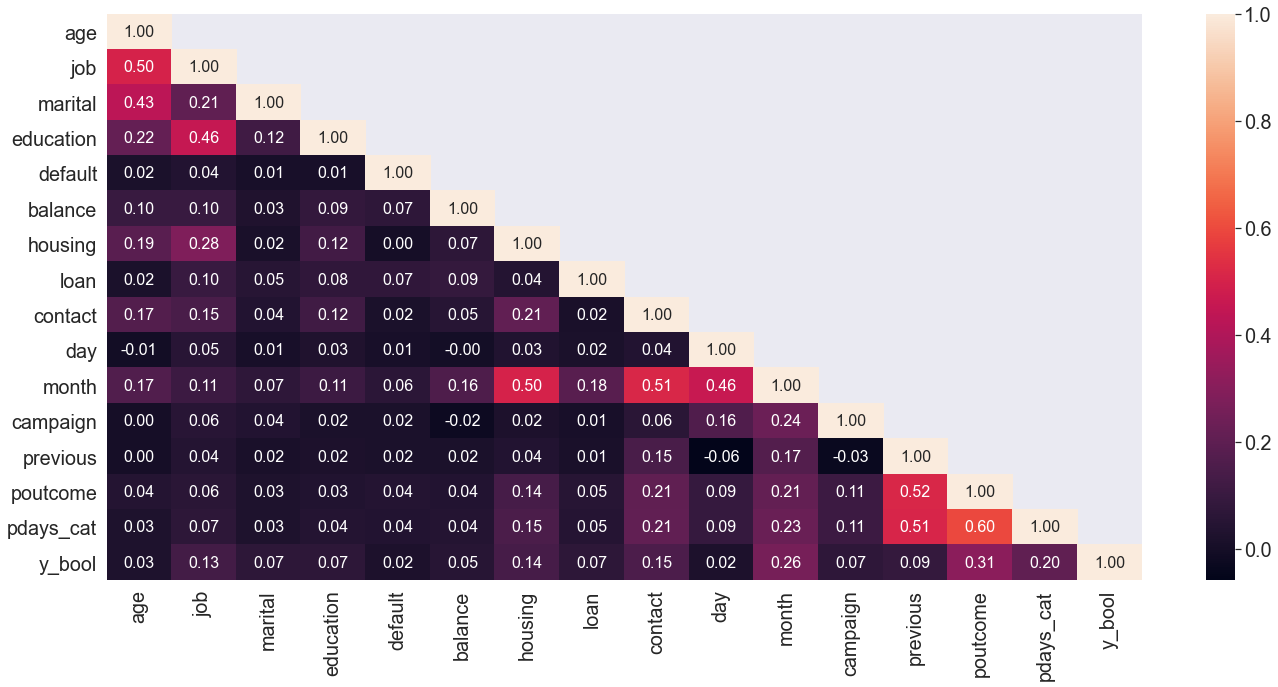

In [65]:
# initial source: https://github.com/ithisted/PetAdoptionPrediction/blob/master/PetAdoptionPrediction.ipynb

columns = data.columns
columns = columns.drop(['cust_id', 'age_cat', 'prev_cat', 'duration', 'age_pop'])
corr = pd.DataFrame(index=columns, columns=columns)

for i in range(0, len(columns)):
    for j in range(i, len(columns)):
        
            if i == j:
                corr_factor = 1.0
            
            elif (columns[i] in cat_col) and (columns[j] in cat_col):
                corr_factor =  cramers_v(data[columns[j]], data[columns[i]])
            
            elif (columns[i] in num_col) and (columns[j] in num_col):
                corr_factor, pvalue = ss.pearsonr(data[columns[j]], data[columns[i]])
                #if pvalue > 0.05:
                    #corr_factor = np.nan
            
            elif (columns[i] in num_col) and (columns[j] in cat_col):
                corr_factor =  correlation_ratio(data[columns[j]], data[columns[i]])
                
            elif (columns[i] in cat_col) and (columns[j] in num_col):
                corr_factor =  correlation_ratio(data[columns[i]], data[columns[j]])
                           
                #if pvalue > 0.05:
                    #corr_factor = np.nan
                
            corr.loc[columns[j],columns[i]] = corr_factor
    
corr.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,10))
sns.set(font_scale=1.8) 
sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={"size": 16})
plt.tight_layout()
plt.savefig(p / ('heatmap.pdf') )
plt.show()    


In [66]:
num_col = ['age', "balance", 'day', 'duration', 'campaign', 'previous']
cat_col = ['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'default', 'housing', 'loan', 'pdays_cat', 'y_bool']
features = ['age', "balance", 'day', 'campaign', 'previous', 'job', 'marital', 'education', 'contact', 'month', 'poutcome', 'default', 'housing', 'loan', 'pdays_cat', 'random']

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Splitting target and features

df_train['random'] = np.random.random(size = df_train.shape[0]) #adding a random column for a baseline on feature importances
X = df_train[features]
y = df_train['y_bool']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [68]:
#https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f

features_to_encode = X_train.columns[X_train.dtypes==object].tolist()  

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
col_trans = make_column_transformer(
                        (OneHotEncoder(),features_to_encode),
                        remainder = "passthrough"
                        )

In [70]:
rf_classifier = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=42,
                      max_features='auto')

In [71]:
X_train

,age,balance,day,campaign,previous,job,marital,education,contact,month,poutcome,default,housing,loan,pdays_cat,random
4335,57,894,18,1,0,selfEmployed,married,tertiary,cellular,nov,unknown,no,yes,no,no contact,0.463731
29171,32,656,20,2,0,management,single,tertiary,cellular,apr,unknown,no,yes,yes,no contact,0.147089
16793,52,199,12,2,0,entrepreneur,divorced,tertiary,unknown,jun,unknown,no,yes,yes,no contact,0.934838
14077,33,0,11,7,0,management,single,tertiary,cellular,aug,unknown,no,no,no,no contact,0.698087
4550,46,245,8,1,3,entrepreneur,married,secondary,cellular,may,failure,no,yes,no,1 year,0.501741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,44,1277,17,1,4,management,single,tertiary,cellular,apr,other,no,yes,no,1 year,0.999597
5390,45,2048,18,1,1,management,single,tertiary,cellular,oct,failure,no,yes,no,more than 1 year,0.574590
860,37,-76,28,1,1,management,married,tertiary,cellular,jan,other,no,yes,no,1 year,0.582450
15795,41,402,17,17,0,blueCollar,married,primary,unknown,jun,unknown,no,no,no,no contact,0.972158


In [72]:
y_train

4335     0
29171    0
16793    0
14077    1
4550     0
        ..
29802    0
5390     1
860      0
15795    0
23654    0
Name: y_bool, Length: 23735, dtype: int64

In [73]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(col_trans, rf_classifier)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'poutcome',
                                                   'default', 'housing', 'loan',
                                                   'pdays_cat'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=50, n_estimators=150,
                                        n_jobs=-1, oob_score=True,
                                        random_state=42))])

In [74]:
y_pred = pipe.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),4)*100} %")

The accuracy of the model is 89.62 %


In [76]:
train_probs = pipe.predict_proba(X_train)[:,1] 
probs = pipe.predict_proba(X_test)[:, 1]
train_predictions = pipe.predict(X_train)

In [77]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

Train ROC AUC Score: 0.8275793888353511
Test ROC AUC  Score: 0.7935198127239661


Recall
            Baseline: 1.0
            Test: 0.15
            Train: 0.15
Precision
            Baseline: 0.11
            Test: 0.68
            Train: 0.71
Roc
            Baseline: 0.5
            Test: 0.79
            Train: 0.83


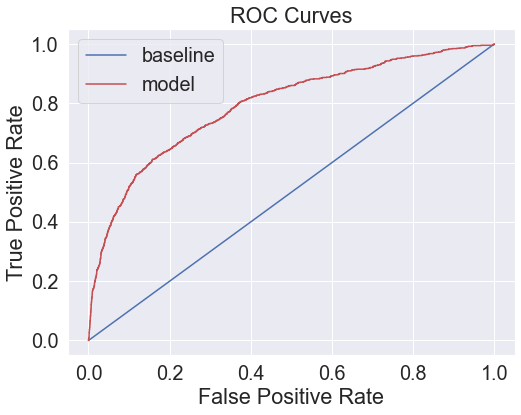

In [78]:
def evaluate_model(y_pred, probs,train_predictions, train_probs):
    baseline = {}
    baseline['recall']=recall_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, probs)
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    for metric in ['recall', 'precision', 'roc']:  
        print(f'''{metric.capitalize()}
            Baseline: {round(baseline[metric], 2)}
            Test: {round(results[metric], 2)}
            Train: {round(train_results[metric], 2)}''')
            
     # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();
evaluate_model(y_pred,probs,train_predictions,train_probs)

In [79]:
confusion_matrix(y_test, y_pred, normalize='all')

array([[0.87917088, 0.00796259],
       [0.09580384, 0.01706269]])

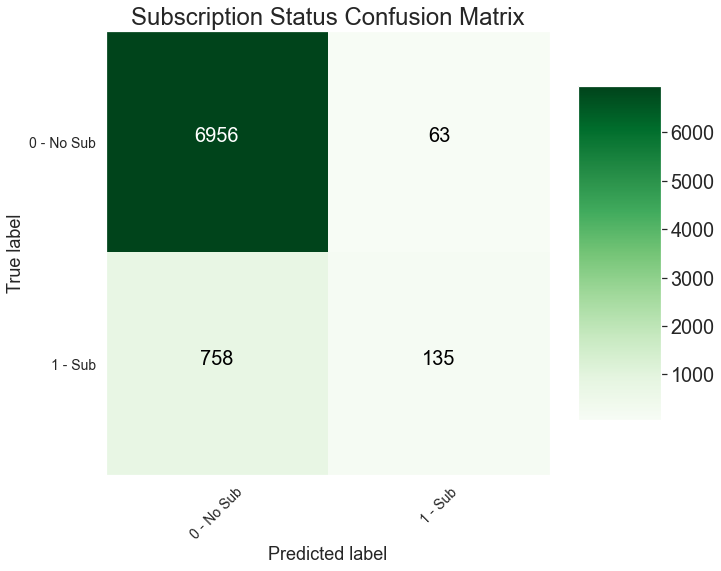

In [80]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Let's plot
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['0 - No Sub', '1 - Sub'],
                      title = 'Subscription Status Confusion Matrix')

Random Forest Feature Importance

In [81]:
print(rf_classifier.feature_importances_)
print(f" There are {len(rf_classifier.feature_importances_)} features in total")

[1.13206112e-03 3.14714650e-03 1.25392059e-04 1.35086456e-04
 1.81901082e-03 3.56125269e-03 2.44695683e-04 7.61043075e-04
 6.52030573e-03 2.07993895e-03 3.98947260e-04 1.45180264e-05
 1.13413687e-03 7.14088861e-03 7.45373775e-03 1.55525492e-03
 3.47740650e-03 8.43025430e-03 1.69713182e-04 2.27175446e-02
 1.83872622e-03 3.92771792e-02 3.22544564e-02 1.19498764e-02
 7.01995740e-04 2.46757026e-03 1.89548496e-03 5.83819885e-03
 1.22423685e-02 2.57796666e-02 1.03554327e-02 5.46417121e-03
 2.28327644e-02 2.03745026e-02 2.74751966e-02 1.55597140e-02
 2.32948984e-01 2.94699556e-02 1.03680540e-04 1.03265851e-04
 4.39402469e-02 4.15602917e-02 4.81846496e-03 5.59341268e-03
 9.40389189e-03 3.91793165e-02 1.57713988e-03 3.42249344e-02
 1.00487742e-01 3.97786084e-02 3.19171803e-02 1.73939142e-02
 3.93202658e-02 1.98530645e-02]
 There are 54 features in total


In [82]:
# Let's look at the first row
print(col_trans.fit_transform(X_train)[0,:])

  (0, 6)	1.0
  (0, 13)	1.0
  (0, 17)	1.0
  (0, 19)	1.0
  (0, 31)	1.0
  (0, 37)	1.0
  (0, 38)	1.0
  (0, 41)	1.0
  (0, 42)	1.0
  (0, 47)	1.0
  (0, 48)	57.0
  (0, 49)	894.0
  (0, 50)	18.0
  (0, 51)	1.0
  (0, 53)	0.46373128365200555


In [83]:
# And the first row of X_train
X_train.iloc[0,:]  

age                    57
balance               894
day                    18
campaign                1
previous                0
job          selfEmployed
marital           married
education        tertiary
contact          cellular
month                 nov
poutcome          unknown
default                no
housing               yes
loan                   no
pdays_cat      no contact
random           0.463731
Name: 4335, dtype: object

In [84]:
def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)
X_train_encoded = encode_and_bind(X_train, features_to_encode)

In [85]:
feature_importances = list(zip(X_train_encoded, rf_classifier.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

Feature: poutcome_success                    Importance: 0.23294898371762604
Feature: age                                 Importance: 0.10048774220469045
Feature: housing_no                          Importance: 0.043940246935353325
Feature: housing_yes                         Importance: 0.0415602917493754
Feature: balance                             Importance: 0.03977860842663452
Feature: previous                            Importance: 0.039320265844649045
Feature: contact_unknown                     Importance: 0.0392771792262436
Feature: pdays_cat_3 months                  Importance: 0.03917931652367557
Feature: pdays_cat_no contact                Importance: 0.034224934394767426
Feature: month_apr                           Importance: 0.032254456355226904
Feature: day                                 Importance: 0.03191718028032747
Feature: poutcome_unknown                    Importance: 0.029469955633585235
Feature: poutcome_failure                    Importance: 0.02747519664391

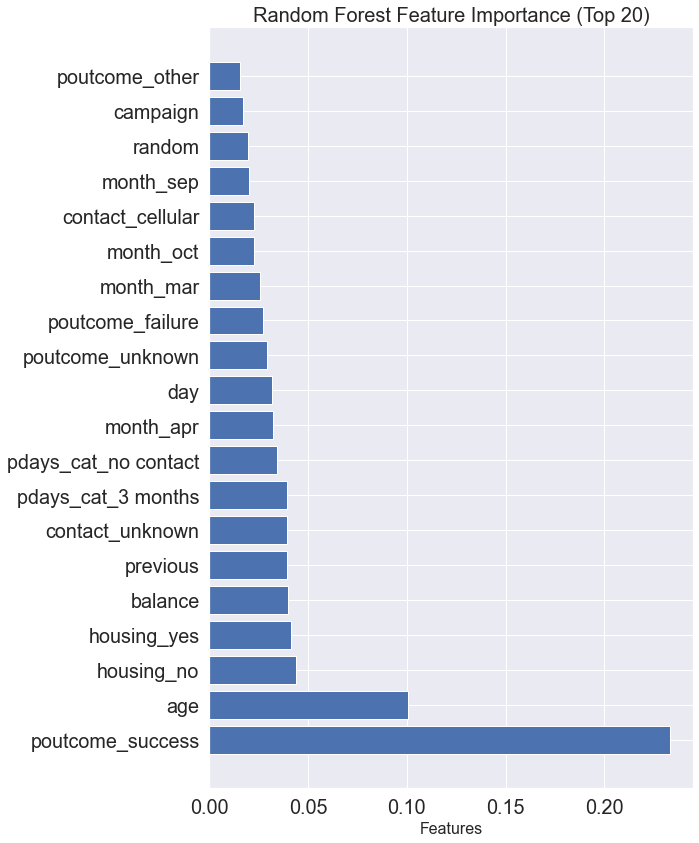

In [86]:
# Plot the top 25 feature importance
feature_names_25 = [i[0] for i in feature_importances_ranked[:20]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:20]]
plt.figure(figsize = (10, 12))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance (Top 20)',
          fontdict= {'fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.tight_layout()
plt.savefig(p / ('Random Forest Feature Importance.pdf') )
plt.show()

In [87]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf_classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [126]:
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 3)]
max_features = ['auto', 'log2']  # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 100, num = 3)]   # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]  # Minimum number of samples required to split a node
min_samples_leaf = [1, 4, 10]    # Minimum number of samples required at each leaf node
bootstrap = [True]       # Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': [None] + list(np.linspace(10, 50, 3).astype(int)),
               'n_jobs' : [8], 
               'bootstrap': bootstrap}

In [127]:
# Evaluate Random Forest Model
# Create base model to tune
rf = RandomForestClassifier(oob_score=True)

pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [128]:

# Create random search model and fit the data
rf_grid = GridSearchCV(
                        estimator = rf,
                        param_grid = random_grid,
                        cv = 3,
                        verbose=2, 
                        scoring='roc_auc')
rf_grid.fit(X_train_encoded, y_train)
rf_grid.best_params_
rf_grid.best_params_

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
[CV] bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=8, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=8, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=8 
[CV]  bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=8, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=275, n_jobs=8 
[CV]  bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=275, n_jobs=8, total=   1.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=275, n_jobs=8 
[CV]  bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1

[Parallel(n_jobs=1)]: Done 2592 out of 2592 | elapsed: 68.0min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 275,
 'n_jobs': 8}

In [129]:
# Use the best model after tuning
best_rf_model = rf_grid.best_estimator_
pipe_best_rf_model = make_pipeline(col_trans, best_rf_model)
pipe_best_rf_model.fit(X_train, y_train)
y_pred_best_rf_model = pipe_best_rf_model.predict(X_test)
pprint(best_rf_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 275,
 'n_jobs': 8,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [130]:
# To look at nodes and depths of trees use on average
n_nodes = []
max_depths = []
for ind_tree in best_rf_model.estimators_:
       n_nodes.append(ind_tree.tree_.node_count)
       max_depths.append(ind_tree.tree_.max_depth)
print(f'Average number of nodes {int(np.mean(n_nodes))}')   
print(f'Average maximum depth {int(np.mean(max_depths))}') 

Average number of nodes 416
Average maximum depth 10


Recall
            Baseline: 1.0
            Test: 0.16
            Train: 0.19
Precision
            Baseline: 0.11
            Test: 0.69
            Train: 0.81
Roc
            Baseline: 0.5
            Test: 0.8
            Train: 0.84


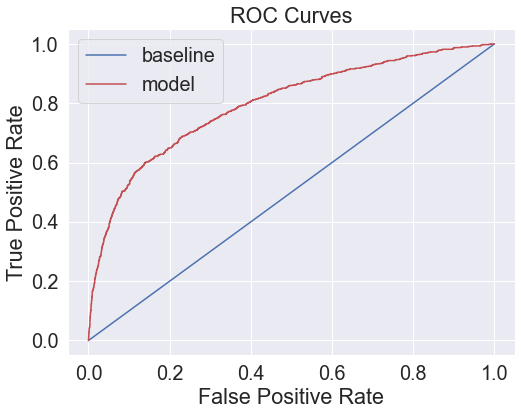

In [131]:
train_rf_predictions = pipe_best_rf_model.predict(X_train)
train_rf_probs = pipe_best_rf_model.predict_proba(X_train)[:, 1]
rf_probs = pipe_best_rf_model.predict_proba(X_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(y_pred_best_rf_model, rf_probs, train_rf_predictions, train_rf_probs)

In [132]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_rf_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, rf_probs)}')

Train ROC AUC Score: 0.838008152917857
Test ROC AUC  Score: 0.7967234830687526


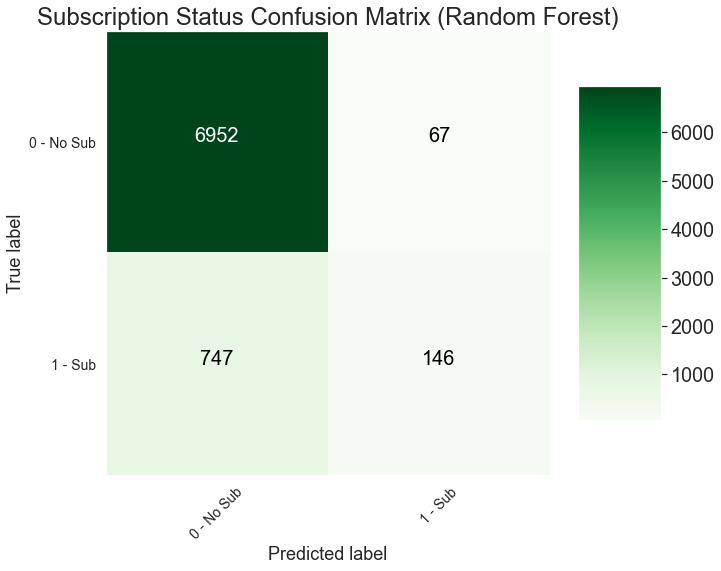

In [133]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_best_rf_model), classes = ['0 - No Sub', '1 - Sub'],
                      title = 'Subscription Status Confusion Matrix (Random Forest)')

In [134]:
#Testing Logistic Regression Model
#Using source: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
from sklearn.linear_model import LogisticRegression

In [135]:
#same as above but using Logistic Regression

# Create base model to tune
lr = LogisticRegression()

pprint(lr.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [136]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = np.logspace(-4, 4, 50)
solver = ['liblinear']

grid_lr = {'penalty': penalty,
               'C': C,
               'solver': solver}

In [137]:
# Create random search model and fit the data
lr_grid = GridSearchCV(
                        estimator = lr,
                        param_grid = grid_lr,
                        cv = 6,
                        verbose=2,  
                        scoring='roc_auc')
lr_grid.fit(X_train_encoded, y_train)
lr_grid.best_params_
lr_grid.best_params_

Fitting 6 folds for each of 100 candidates, totalling 600 fits
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l2, solver=liblinear, total=   0.1s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l2, solver=liblinear, total=   0.1s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l2, solver=liblinear, total=   0.1s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l2, solver=liblinear, total=   0.1s
[CV] 

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=35.564803062231285, penalty=l2, solver=liblinear, total=   0.5s
[CV] C=35.564803062231285, penalty=l2, solver=liblinear ..............
[CV]  C=35.564803062231285, penalty=l2, solver=liblinear, total=   0.2s
[CV] C=51.79474679231202, penalty=l1, solver=liblinear ...............
[CV]  C=51.79474679231202, penalty=l1, solver=liblinear, total=   0.2s
[CV] C=51.79474679231202, penalty=l1, solver=liblinear ...............
[CV]  C=51.79474679231202, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=51.79474679231202, penalty=l1, solver=liblinear ...............
[CV]  C=51.79474679231202, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=51.79474679231202, penalty=l1, solver=liblinear ...............
[CV]  C=51.79474679231202, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=51.79474679231202, penalty=l1, solver=liblinear ...............
[CV]  C=51.79474679231202, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=51.79474679231202, penalty=l1, solver=liblinear ...............
[CV]

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=75.43120063354607, penalty=l2, solver=liblinear, total=   0.5s
[CV] C=75.43120063354607, penalty=l2, solver=liblinear ...............
[CV]  C=75.43120063354607, penalty=l2, solver=liblinear, total=   0.2s
[CV] C=109.85411419875572, penalty=l1, solver=liblinear ..............
[CV]  C=109.85411419875572, penalty=l1, solver=liblinear, total=   0.2s
[CV] C=109.85411419875572, penalty=l1, solver=liblinear ..............
[CV]  C=109.85411419875572, penalty=l1, solver=liblinear, total=   0.2s
[CV] C=109.85411419875572, penalty=l1, solver=liblinear ..............
[CV]  C=109.85411419875572, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=109.85411419875572, penalty=l1, solver=liblinear ..............
[CV]  C=109.85411419875572, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=109.85411419875572, penalty=l1, solver=liblinear ..............
[CV]  C=109.85411419875572, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=109.85411419875572, penalty=l1, solver=liblinear ..............
[

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.8min finished


{'C': 75.43120063354607, 'penalty': 'l2', 'solver': 'liblinear'}

{'C': 75.43120063354607,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
Recall
            Baseline: 1.0
            Test: 0.17
            Train: 0.18
Precision
            Baseline: 0.11
            Test: 0.63
            Train: 0.66
Roc
            Baseline: 0.5
            Test: 0.78
            Train: 0.77


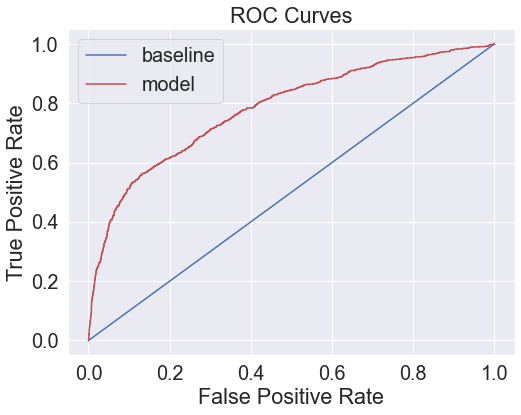

In [138]:
# Use the best model after tuning
best_lr_model = lr_grid.best_estimator_
pipe_best_lr_model = make_pipeline(col_trans, best_lr_model)
pipe_best_lr_model.fit(X_train, y_train)
y_pred_best_lr_model = pipe_best_lr_model.predict(X_test)
pprint(best_lr_model.get_params())

train_lr_predictions = pipe_best_lr_model.predict(X_train)
train_lr_probs = pipe_best_lr_model.predict_proba(X_train)[:, 1]
lr_probs = pipe_best_lr_model.predict_proba(X_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(y_pred_best_lr_model, lr_probs, train_lr_predictions, train_lr_probs)

In [139]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_lr_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, lr_probs)}')

Train ROC AUC Score: 0.7696512219527297
Test ROC AUC  Score: 0.7818833443124381


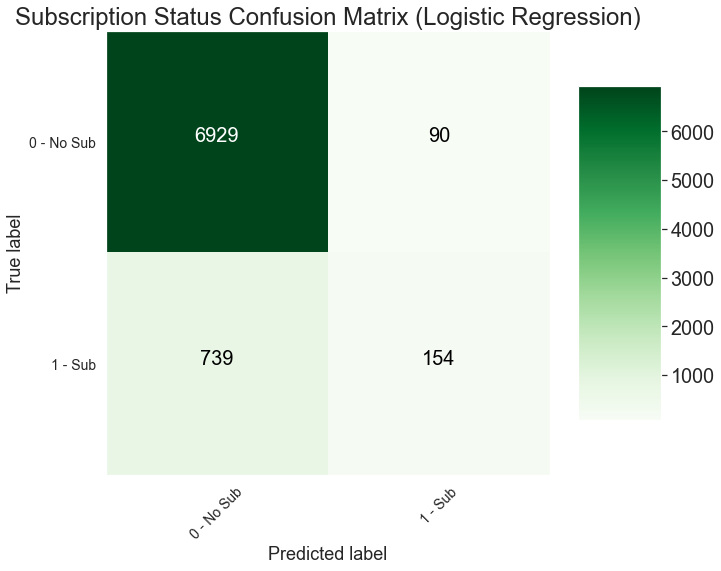

In [140]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_best_lr_model), classes = ['0 - No Sub', '1 - Sub'],
                      title = 'Subscription Status Confusion Matrix (Logistic Regression)')

In [141]:
#Testing xgboost Model
#Using source: https://www.kaggle.com/phunter/xgboost-with-gridsearchcv
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

In [142]:
#same as above but using xgboost

# Create base model to tune
xgb_model = xgb.XGBClassifier()

pprint(xgb_model.get_params())

{'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': True,
 'validate_parameters': None,
 'verbosity': None}


In [170]:
xgb_param = {'nthread':[8], #when use hyperthread, xgboost may become slower
              'objective': ['binary:logistic'],
              'learning_rate': [0.01, 0.05, 0.1, 0.5], #so called `eta` value
              'max_depth': [4, 8, 12],
              'seed': [42]
              }

In [171]:
# Create random search model and fit the data
xgb_grid = GridSearchCV(
                        estimator = xgb_model,
                        param_grid = xgb_param,
                        n_jobs = 5, 
                        cv = 3,
                        verbose=2,  
                        scoring='roc_auc')
xgb_grid.fit(X_train_encoded, y_train)
xgb_grid.best_params_
xgb_grid.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  36 out of  36 | elapsed:   55.0s finished
C:\Users\Andrew\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:27:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.1,
 'max_depth': 4,
 'nthread': 8,
 'objective': 'binary:logistic',
 'seed': 42}

C:\Users\Andrew\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:27:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'nthread': 8,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 42,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': True,
 'validate_parameters': 1,
 'verbosity': None}
Recall
            Baseline: 1.0
         

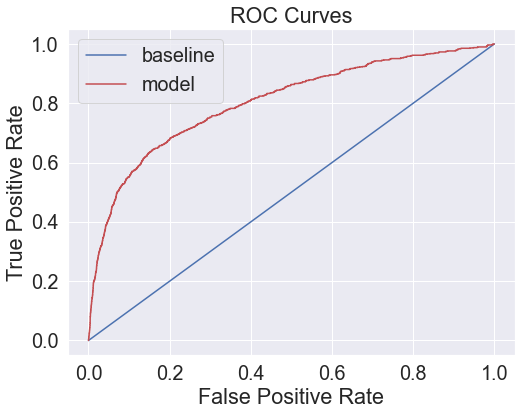

In [172]:
# Use the best model after tuning
best_xgb_model = xgb_grid.best_estimator_
pipe_best_xgb_model = make_pipeline(col_trans, best_xgb_model)
pipe_best_xgb_model.fit(X_train, y_train)
y_pred_best_xgb_model = pipe_best_xgb_model.predict(X_test)
pprint(best_xgb_model.get_params())

train_xgb_predictions = pipe_best_xgb_model.predict(X_train)
train_xgb_probs = pipe_best_xgb_model.predict_proba(X_train)[:, 1]
xgb_probs = pipe_best_xgb_model.predict_proba(X_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(y_pred_best_xgb_model, xgb_probs, train_xgb_predictions, train_xgb_probs)

In [175]:
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, xgb_probs)}')
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_xgb_probs)}')

Test ROC AUC  Score: 0.8036475782338994
Train ROC AUC Score: 0.8298233650541468


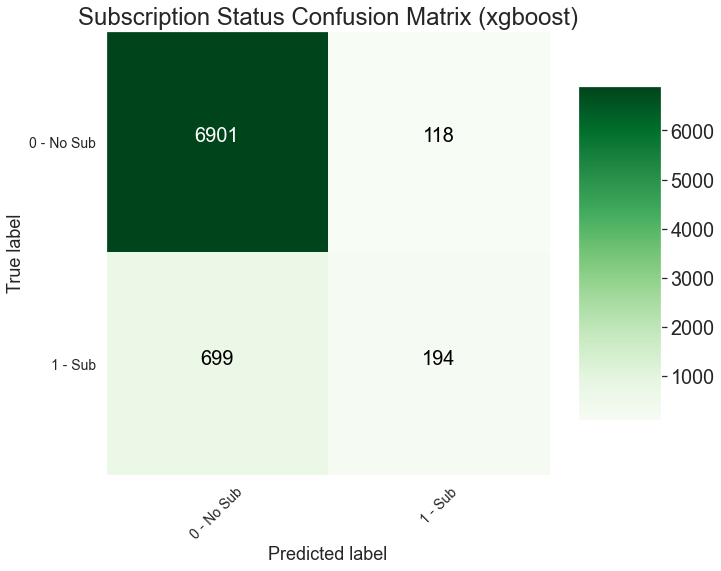

In [176]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_best_xgb_model), classes = ['0 - No Sub', '1 - Sub'],
                      title = 'Subscription Status Confusion Matrix (xgboost)')

In [ ]:
df_test.shape

In [ ]:
df_test['random'] = np.random.random(size = df_t.shape[0]) #adding a random column for a baseline on feature importances

X_test = df_test[features]
y_test = df_test['y_bool']

In [ ]:
final_y = pipe_best_model.predict(X_test)

In [ ]:
final_report = df_test
final_report['subscription_prediction'] = final_y
final_report = final_report.loc[:,['y_bool', 'subscription_prediction']]

# Replace 1-0 with Yes-No to make it interpretable
final_report= final_report.replace(1, 'Yes')
final_report= final_report.replace(0, 'No')

In [ ]:
final_report = final_report.rename(columns={'y_bool':'True Value', 'subscription_prediction': 'Predicted Value'})
final_report

In [ ]:
final_report.value_counts()